Разведочный анализ данных датасета https://doi.org/10.48804/K3VSND

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from IPython.display import Image
import urllib.request

In [19]:
urls = [
    "https://rdr.kuleuven.be/api/access/datafile/135611?gbrecs=true",
    "https://rdr.kuleuven.be/api/access/datafile/41029?gbrecs=true",
    "https://rdr.kuleuven.be/api/access/datafile/137071?gbrecs=true",
    "https://rdr.kuleuven.be/api/access/datafile/41033?gbrecs=true",
    "https://rdr.kuleuven.be/api/access/datafile/41032?gbrecs=true",
    "https://rdr.kuleuven.be/api/access/datafile/41034?gbrecs=true",
    "https://rdr.kuleuven.be/api/access/datafile/137075?gbrecs=true"
]
with open("urls.txt", "w") as text_file:
    for url in urls:
        text_file.write(url + "\n")

In [20]:
file_names = ["dataset_description.json", "participants_description.json", "participants.tsv", 
             "task_listening_eeg.json", "task_listening_events.json", "task_listening_stimulation.json",
             "task_restingstate_events.json"]
with open("urls.txt", "r") as urls:
    lines = urls.readlines()
    for line, name in zip(lines, file_names):
        urllib.request.urlretrieve(line, name)

In [4]:
for name in [file_name for file_name in file_names if file_name != "participants.tsv"]:
    with open(name, "r") as file:
        print("--" * 20)
        print(f"Описание файла {name}")
        print(json.dumps(json.load(file), indent=4))

----------------------------------------
Описание файла dataset_description.json
{
    "Name": "SparrKULee",
    "BIDSVersion": "1.8.0",
    "DatasetType": "raw",
    "Authors": [
        "Bernd Accou",
        "Lies Bollens",
        "Marlies Gillis",
        "Wendy Verheijen",
        "Hugo Van hamme",
        "Tom Francart"
    ],
    "AuthorsEmail": [
        "bernd.accou@kuleuven.be",
        "lies.bollens@kuleuven.be",
        "marlies.gillis@kuleuven.be",
        "wendy.verheijen@kuleuven.be",
        "hugo.vanhamme@esat.kuleuven.be",
        "tom.francart@kuleuven.be"
    ],
    "License": "Attribution-NonCommercial 4.0 International License (CC BY-NC 4.0) for the EEG data. Stimuli can only be used for non-commercial purposes.",
    "Acknowledgements": "Amelie Algoet, Jolien Smeulders, Lore Kerkhofs, Sara Peeters, Merel Dillen, Ilham Gamgami, Amber Verhoeven, Vitor Vasconselos, Jard Hendrickx, Lore Verbeke and Ana Carbajal Chavez",
    "Funding": [
        "KU Leuven Special Re

**Основные моменты:** Для измерения ЭЭГ были приглашены участники обоих полов. Участникам было указано прослушать аудиофайл. Измерение 64-канального ЭЭГ было совершено с частотой дискретизации равным 8192.

---

### Участники эксперимента 

Дальше проанализируем выборку участников. 

In [5]:
participants = pd.read_csv('./participants.tsv', sep='\t')
participants

,participant_id,age,sex,native_language,handedness,extra_comments
0,sub-001,21 to 23,F,"Dutch, Flemish",right,NaN
1,sub-002,18 to 20,F,"Dutch, Flemish",right,NaN
2,sub-003,18 to 20,F,"Dutch, Flemish",right,NaN
3,sub-004,18 to 20,F,"Dutch, Flemish",right,NaN
4,sub-005,18 to 20,F,"Dutch, Flemish",right,NaN
...,...,...,...,...,...,...
80,sub-081,21 to 23,F,"Dutch, Flemish",right,NaN
81,sub-082,21 to 23,F,"Dutch, Flemish",right,NaN
82,sub-083,21 to 23,F,"Dutch, Flemish",right,NaN
83,sub-084,24 to 26,F,"Dutch, Flemish",right,NaN


В выборке имеется 85 участников.

In [6]:
participants['age'].unique()

array(['21 to 23', '18 to 20', '24 to 26', '27 to 30'], dtype=object)

Приглашенные участники делились на 4 возрастные группы.

Число женщин:  74
Число мужчин:  11


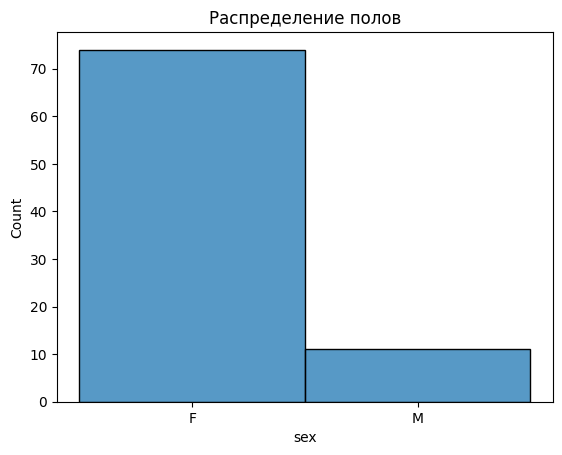

In [7]:
plt.title('Распределение полов')
sns.histplot(participants['sex']);
print('Число женщин: ', np.sum(participants['sex'] == 'F'))
print('Число мужчин: ', np.sum(participants['sex'] == 'M'))

### Стимулы

Изображения взяты из соответствующей статьи. 

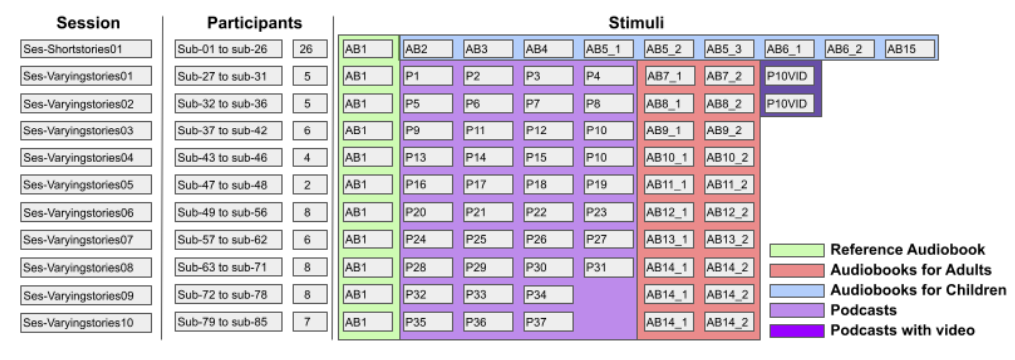

In [8]:
Image("../figures/presented_stimuli.png")

Все участники прослушали 6, 7, 8 или 10 стимулов, каждая из которых имеет примерную продолжительность 15 мин. 
После прослушивания участников спрашивали про содержания аудиофрагмента. Это было с целью мотивировать участников обращать внимания во время прослушивания.

Стимулы были разделены на следующие категории:
- Референсные аудиокниги 
- Аудиокниги для детей и взрослых. Если длина превышала 15 мин, то аудиокнига делилась на части
- Аудиокниги с шумом
- Подкасты про ответы на научные вопросы
- Подкасты с видео

Также отметим, согласно авторам, что частота дискретизации ЭЭГ и стимулов была занижена до 64 Гц. 

In [9]:
import os, os.path
dataset_folder = "/home/bukkacha/Desktop/EEGDataset"
eeg_folder = os.path.join(dataset_folder, "derivatives/preprocessed_eeg")
counter = 0
for sub in os.listdir(eeg_folder):
    path_sub = os.path.join(eeg_folder, sub)
    if os.path.isdir(path_sub):
        ses = os.listdir(path_sub)[0]
        full_path = os.path.join(path_sub, ses)
        files = os.listdir(full_path)
        for file_name in files:
            if "artefact" in file_name:
                print(full_path)
                continue
            counter += 1
        
counter

/home/bukkacha/Desktop/EEGDataset/derivatives/preprocessed_eeg/sub-002/ses-shortstories01


665

Имеем всего 665 пар (исключая бракованные). 

### Явный вид данных

На примере конкретного сигнала ЭЭГ и стимула посмотрим какими данными мы будем работать.

In [2]:
# весит 30 Мб
urllib.request.urlretrieve("https://rdr.kuleuven.be/api/access/datafile/136276?gbrecs=true", 
                           "sub_001_audiobook_1_eeg.npy");
urllib.request.urlretrieve("https://rdr.kuleuven.be/api/access/datafile/137157?gbrecs=true", 
                           "audiobook_1_envelope.npy");

In [43]:
eeg = np.load("sub_001_audiobook_1_eeg.npy")
env_stim = np.load("audiobook_1_envelope.npy")

In [44]:
eeg

array([[ 2.91190144,  5.24515395,  6.85442542, ..., -4.1788156 ,
        -1.64721922, -4.1297108 ],
       [ 1.28761259,  2.65540489,  4.21729422, ...,  1.15973719,
         2.25994515, -0.44296132],
       [ 1.68444295,  2.14982537,  2.0341486 , ..., -1.61322093,
        -0.05149848, -1.58436349],
       ...,
       [-1.22009992, -3.32514724,  2.3351159 , ..., -3.00936608,
         0.01443311, -2.05622155],
       [-0.9120842 , -2.63914438,  0.7126077 , ..., -2.1028855 ,
         0.08387135,  0.85487463],
       [-1.84572973, -4.65242521, -0.25433346, ..., -3.46189679,
         0.82149176, -2.46507728]])

In [45]:
eeg.shape

(64, 60096)

Как видим у ЭЭГ 64 канала и продолжительность $\frac{60096}{64 \cdot 60} \approx 15$ минут.

In [47]:
env_stim

array([[0.00421509],
       [0.01188228],
       [0.00744389],
       ...,
       [0.00770379],
       [0.0088369 ],
       [0.00483418]])

In [46]:
env_stim.shape

(59958, 1)

А стимул представляет собой временной ряд длительностью тоже $\frac{59958}{64 \cdot 60} \approx 15$ минут.

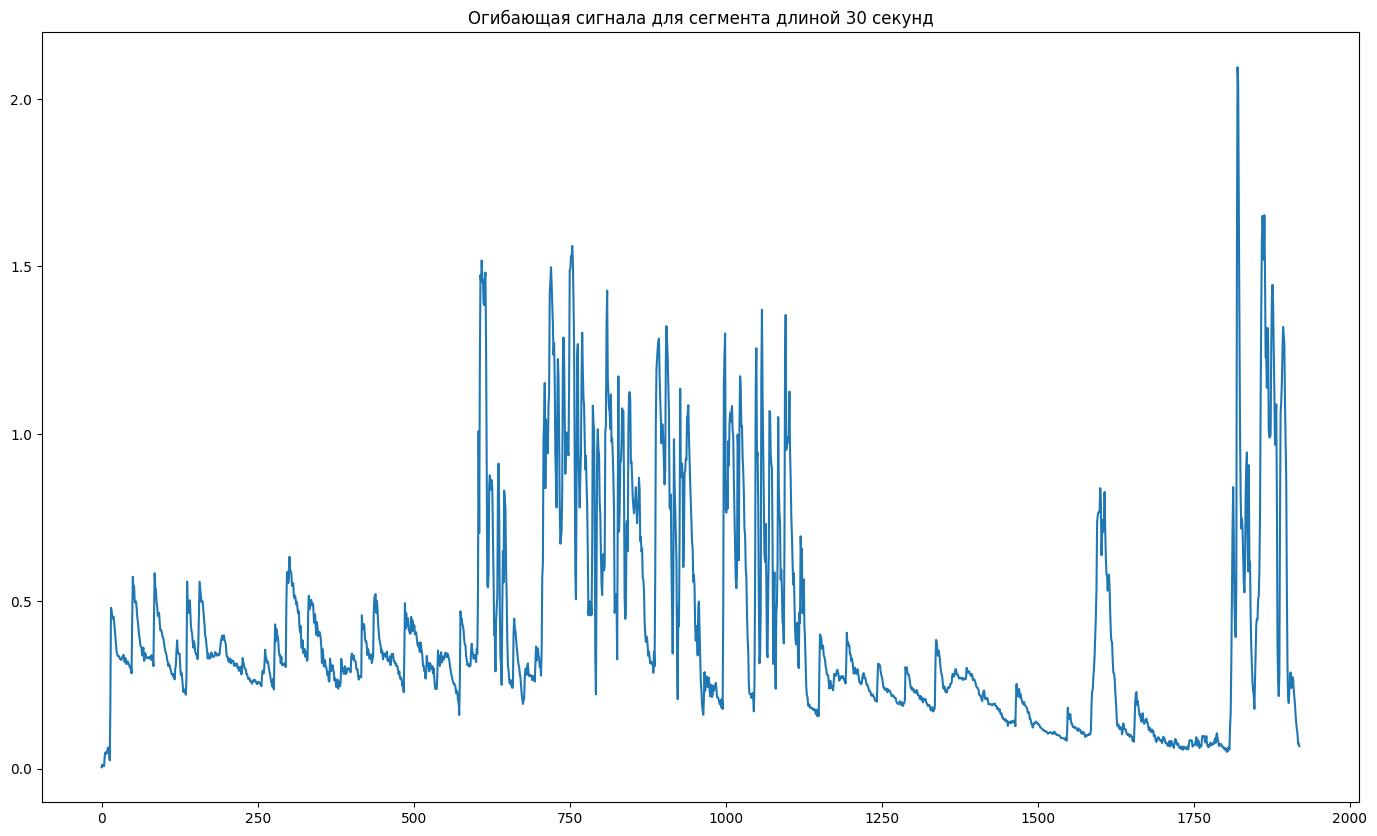

In [55]:
plt.figure(figsize=(17, 10))
plt.title('Огибающая сигнала для сегмента длиной 30 секунд')
plt.plot(np.arange(len(env_stim[:64*60//2])), env_stim[:64*60//2]);

In [56]:
# весит 70 Мб
urllib.request.urlretrieve("https://rdr.kuleuven.be/api/access/datafile/37109?gbrecs=true", 
                           "audiobook_1.npz.gz")
!gzip -d audiobook_1.npz.gz
audiobook_1 = np.load("audiobook_1.npz")
audio = audiobook_1['audio']
fs = audiobook_1['fs'].item()

('audiobook_1.npz.gz', <http.client.HTTPMessage at 0x7f2b4a1ac7f0>)

In [7]:
audio.shape

(44967811,)

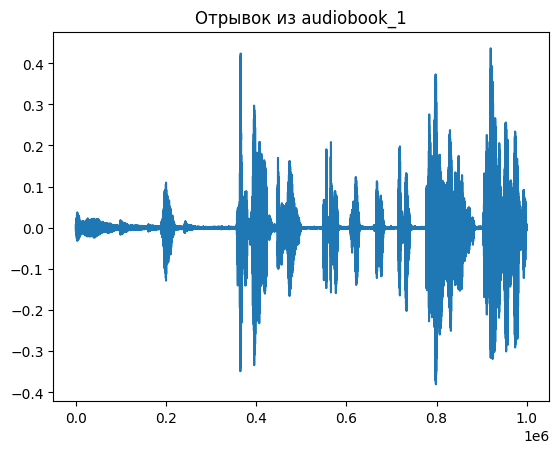

In [17]:
plt.title('Отрывок из audiobook_1')
plt.plot(audio[1000000:2000000]);

# Clean up files

In [21]:
for file in file_names + ["audiobook_1_envelope.npy", "sub_001_audiobook_1_eeg.npy", "urls.txt", 
                          "audiobook_1.npz"]:
    !rm {file}